In [1]:
from preprocess.preprocess import load_dataset, compute_label_agg, select_data, get_data_loaders, undersample

import torch
import torch.nn as nn
import torch.optim as optim

from models.RNN import RNN
from utils.RNN_utils import *

d:\SUTD\T6\DL Project\Deep_Learning_ECGclassification\utils\RNN_utils.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
# Define device for torch
use_cuda = True
device = torch.device("cuda" if (
    use_cuda and torch.cuda.is_available()) else "cpu")
print(device)

cuda


# Define options


In [3]:
LOAD_DATASET = True
TRAIN_PATH = './PTB_train_undersampled.pt'
VALID_PATH = './PTB_valid_undersampled.pt'
TEST_PATH = './PTB_test_undersampled.pt'
SAVE_NAME = 'RNN_undersampled_epoch_30'
SAVE_DIR = './model_saves/'
BATCH_SIZE = 128

EPOCH = 10

# torch.manual_seed(0)

# Loading the dataset


In [4]:
if LOAD_DATASET:
    train_loader = torch.load(TRAIN_PATH)
    valid_loader = torch.load(VALID_PATH)
    test_loader = torch.load(TEST_PATH)
else:
    path = './data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/'

    data, raw_labels = load_dataset(path)

    labels = compute_label_agg(raw_labels, path)

    data, labels, y = select_data(data, labels)

    data, labels, y = undersample(data, labels, y)

    train_loader, valid_loader, test_loader = get_data_loaders(
        data, labels, y, BATCH_SIZE)

    torch.save(train_loader, TRAIN_PATH)
    torch.save(valid_loader, VALID_PATH)
    torch.save(test_loader, TEST_PATH)

# Training the model


In [5]:

model = RNN().to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-2)
criterion = nn.BCEWithLogitsLoss()

model = train_RNN(EPOCH, train_loader, valid_loader, model,
                  criterion, optimizer, device=device, save_dir=SAVE_DIR, model_save_name=SAVE_NAME)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: [1/10], Step [3520/139050] | Train Loss:  0.583         | Train Accuracy:  0.319         | Val Loss:  0.582         | Val Accuracy:  0.313
Model saved to ==> ./model_saves/model_RNN_undersampled_epoch_30.pt
Epoch: [1/10], Step [6976/139050] | Train Loss:  0.584         | Train Accuracy:  0.320         | Val Loss:  0.580         | Val Accuracy:  0.338
Model saved to ==> ./model_saves/model_RNN_undersampled_epoch_30.pt
Epoch: [1/10], Step [10432/139050] | Train Loss:  0.581         | Train Accuracy:  0.317         | Val Loss:  0.580         | Val Accuracy:  0.306
Epoch: [1/10], Step [13905/139050] | Train Loss:  0.578         | Train Accuracy:  0.325         | Val Loss:  0.577         | Val Accuracy:  0.365
Model saved to ==> ./model_saves/model_RNN_undersampled_epoch_30.pt
Epoch: [2/10], Step [17425/139050] | Train Loss:  0.575         | Train Accuracy:  0.327         | Val Loss:  0.580         | Val Accuracy:  0.310
Epoch: [2/10], Step [20881/139050] | Train Loss:  0.578        

# Evaluate and plot losses


Test Accuracy:  0.482


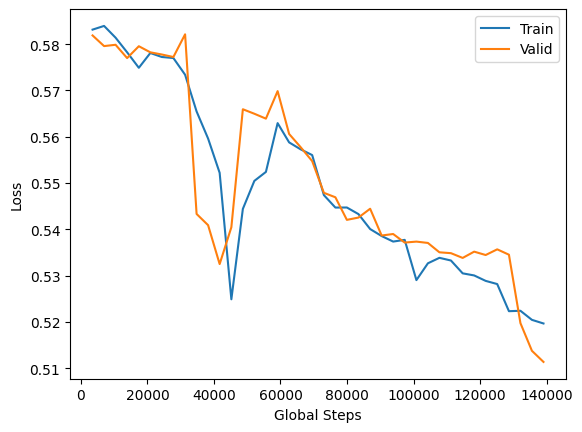

In [6]:
test_accuracy = evaluate_RNN(model, test_loader)
plot_losses(metrics_save_name=SAVE_NAME, save_dir=SAVE_DIR)
rename_with_acc(SAVE_NAME, SAVE_DIR, test_accuracy)